<a href="https://colab.research.google.com/github/Qualot/deep-learning-from-scratch/blob/colab/ch04/loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

In [ ]:
np.set_printoptions(linewidth=10000)

In [ ]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

#Sum of squared error: 2乗和誤差
$$
  E = \sum_{k} \left(y_k - t_k \right)^2
$$

In [ ]:
def sum_squared_error(y, t):
  return 0.5 * np.sum((np.array(y) - np.array(t))**2)

## When the softmax returns "2"


In [ ]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
print(sum_squared_error(y, t))

0.09750000000000003


## When the softmax returns "7"


In [ ]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
print(sum_squared_error(y, t))

0.5975


#Cross entrypy error: 交差エントロピー誤差
$$
  E = -\sum_{k} t_k \mathrm{log} \left(y_k \right)
$$

In [ ]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  delta = 1e-7
  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + delta)) / batch_size

In [ ]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338


In [ ]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

2.302584092994546


In [ ]:
t = np.array([2, 1, 0, 3])
# Calculate the number of classes
num_classes = np.max(t) + 1

# Create a one-hot label array using numpy's eye function
t_goal = np.eye(num_classes)[t]

print(t_goal)

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


# MNIST のロード

In [ ]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

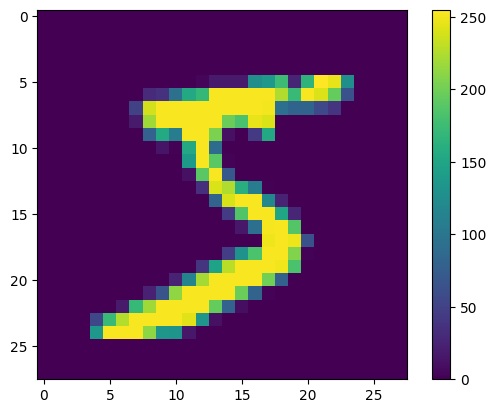

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
def get_data():
  #when using dataset library
  #  (x_train, t_train), (x_test, t_test) = mnist.load_data(normalize=True, flatten=True, one_hot_label=False)
  (x_train, t_train), (x_test, t_test) = mnist.load_data()

  #normalize
  x_train, x_test = x_train / 255.0, x_test / 255.0

  #flatten
  x_train, t_train, x_test, t_test = [arr.reshape(arr.shape[0], -1) for arr in (x_train, t_train, x_test, t_test)]

  #one-hot
  t_train = to_categorical(t_train)
  t_test = to_categorical(t_test)

  print(f"x_train.shape is ... {x_train.shape}")
  print(f"t_train.shape is ... {t_train.shape}")
  print(f"x_test.shape is ... {x_test.shape}")
  print(f"t_test.shape is ... {t_test.shape}")

  train_size = x_train.shape[0]
  batch_size = 10
  batch_mask = np.random.choice(train_size, batch_size)
  print(f"batch_mask is ... {batch_mask}")
  print()

  print(f"x_batch is ... \n{x_train[batch_mask].shape}")
  print()
  print(f"t_batch is ... \n{t_train[batch_mask]}")
  print()
  print()

  return x_test, t_test

In [ ]:
x, t = get_data()
print(t[0])

x_train.shape is ... (60000, 784)
t_train.shape is ... (60000, 10)
x_test.shape is ... (10000, 784)
t_test.shape is ... (10000, 10)
batch_mask is ... [56472 28069 51005 26629 23017 28607 53185 26502 18679  7280]

x_batch is ... 
(10, 784)

t_batch is ... 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
alist = np.array(range(10))
blist = np.array(range(5))
print(alist)
print(blist)
print(alist[blist*2])
print(alist.shape)
print(alist.reshape(1, alist.size).shape)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4]
[0 2 4 6 8]
(10,)
(1, 10)


# Numerical differentials

In [82]:
def numerical_diff(f, x):
  h = 1e-4 #0.0001
  return (f(x+h) - f(x-h)) / (2.0 * h)

In [83]:
def function_1(x):
  return 0.01*x**2 + 0.1 * x

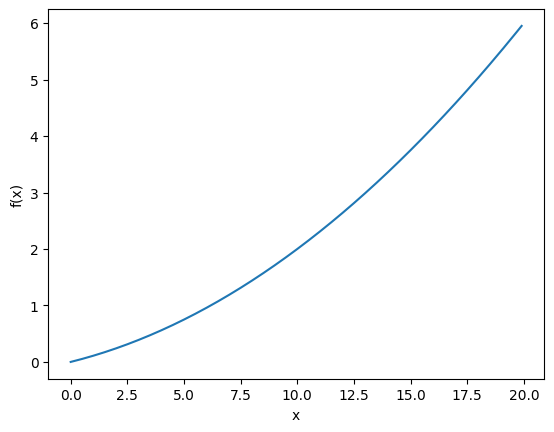

In [84]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [85]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))


0.1999999999990898
0.2999999999986347


In [86]:
def function_2(x):
  return np.sum(x**2)

In [92]:
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x)
  print(f"x.size is ... {x.size}")
  for idx in range(x.size):
    tmp_val = x[idx]
    # f(x+h)
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x-h)
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val

  return grad

In [93]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))


x.size is ... 2
[6. 8.]
x.size is ... 2
[0. 4.]
x.size is ... 2
[6. 0.]


In [95]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

print(f"X [size={X.size}] is ... \n{X}")
print()
print(f"Y [size={Y.size}] is ... \n{Y}")
print()

X = X.flatten()
Y = Y.flatten()

print("After flattening...")
print(f"X [size={X.size}] is ... \n{X}")
print()
print(f"Y [size={Y.size}] is ... \n{Y}")
print()

grad = numerical_gradient(function_2, np.array([X, Y]).T).T

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.draw()
plt.show()

X [size=324] is ... 
[[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5 

IndexError: ignored